# Introduction to Machine Learning in Python


In this tutorial you will learn how tu use various ML related libraries and algoritms.

In [ ]:
# You may need to run this.
# pip install xlrd

# Basic Libraries

Python contains large number of libraries with functions ready to use. This means that you don't need to code everything from scratch. Instead, you simply call the corresponding function from the library. Here we list some of the most common libraries used in ML and in data analysis in general:

-   **NumPy**: NumPy is a fundamental library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. https://numpy.org/doc/stable/user/absolute_beginners.html
-   **Pandas**: Pandas is a tool enabling to hadle and analyze tabular data e.g., spreadsheets or databases. It is very useful if you need to read data saved in Excel files. https://pandas.pydata.org/docs/user_guide/index.html#user-guide
-   **matplotlib**: Matplotlib contains tools for plotting and visualizations of the data. https://matplotlib.org/
-   **Sci-kit Learn**: Tools for predictive ML analysis, e.g. clustering, classification, regression. https://scikit-learn.org/stable/
-   **TensorFlow**: Library for Machine learning, focused mainly on the neural networks. https://www.tensorflow.org/
- **Atomic Simulator Environment (ASE)**: The Atomic Simulation Environment is a set of tools and modules for setting up, manipulating, running, visualizing and analyzing atomistic simulations. https://wiki.fysik.dtu.dk/ase/

In [ ]:
#First Let us import all the modules we need to start our tutorial on

import numpy as np  #The numpy package
import pandas as pd # The pandas data framework
import matplotlib.pyplot as plt # The plotting library
import sklearn as sklearn # General purpose ML framework for python
import tensorflow as tensorflow #Tensor Flow framework

In [ ]:
# Now as all the libraries got imported we can check which versions
# libraries we are running

In [ ]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)

Numpy Version 1.19.5
Pandas Version 1.2.4


In [ ]:
# %matplotlib inline

In [ ]:
# This sets a common random seeds so we all obtain the same results
np.random.seed(42)

# Classic example: Boston housing dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

The objective is to predict the housing values in suburbs of Boston.

In [ ]:
# Here we load the dataset
from sklearn import datasets
boston_data = sklearn.datasets.load_boston()

data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
target = boston_data.target

In [ ]:
# this shows us the description of the dataset
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# This is the clean data that we can use for the analysis
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


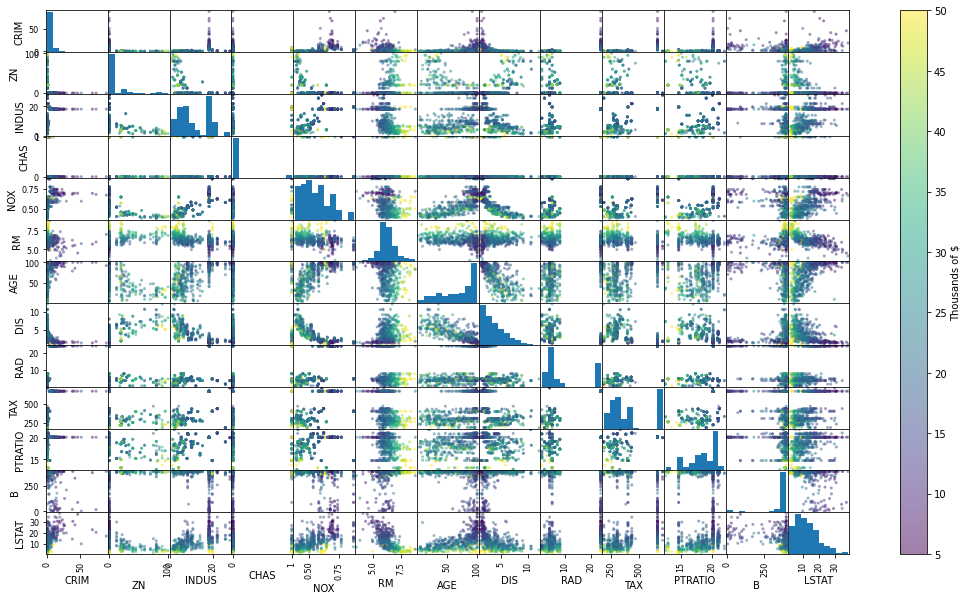

In [ ]:
# The following figure shows us a table with scatter plots for each two pairs of features.
# The diagonal plots are the histograms for the variables
# The scatter plots are colored with the target values

fig, ax = plt.subplots(figsize=[18,10])
caxes = pd.plotting.scatter_matrix(data, c=target, ax=ax)
im = caxes[0,1].collections[0]
cbar = fig.colorbar(im, ax=caxes)
cbar.set_label('Thousands of $')
plt.show()

# Unsupervised Learning 
### Libraries loaded from Scikit-Learn (https://scikit-learn.org/stable/index.html) 

Here we use algortithms to elucidate the structure of the training data. We cluster the data points in groups, and project them in two dimensions to understand their distribution.

In [ ]:
# clustering algorithm
from sklearn.cluster import KMeans

# linear dimensionality analysis
from sklearn.decomposition import PCA

# nonlinear dimensionality analysis
from sklearn.manifold import TSNE

In [ ]:
# Unsupervised learning methods are sensistive to the mean value and the variance of each feature. 
# Here we normalize the data so all the features have zero mean and equal variance
normalized_data = (data - data.mean()) / data.std()

### K-Means Clustering
Here we cluster the data points into groups. The most straighforward method to do so is K-means. K-means cluster the points in K groups by finding K centers of mass of the data. It separates the space with linear boundaries. 

The "Elbow curve" is a tool that helps to define the suitable number of clusters. When the decrease of the curve slows down it means more clusters are unnecessary. However, the stopping criteria is arbitrary.

Read more about K-means: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

Read more about the Elbow curve here: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [ ]:
k_ellbow = []
for E in range(1,15):
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(normalized_data)
    score = kmeans.score(normalized_data)
    k_ellbow.append(score)

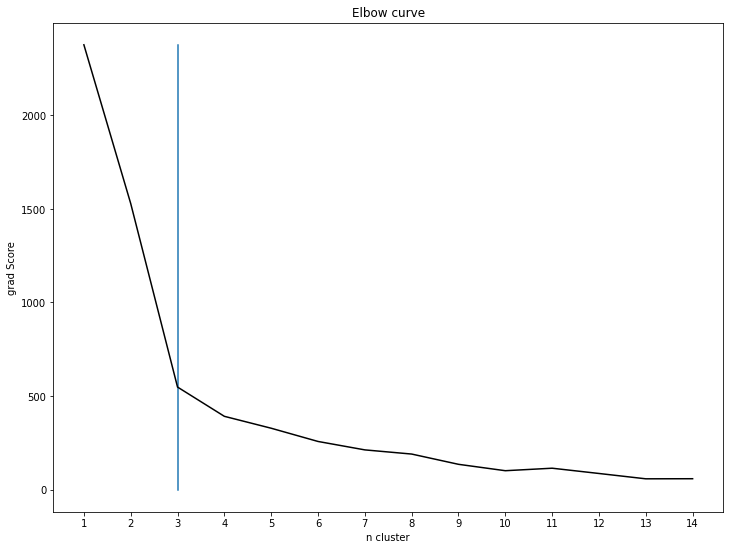

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Elbow curve')
plt.xlabel('n cluster')
plt.ylabel('grad Score')
plt.plot([3,3],[0,np.max(np.gradient(k_ellbow))])
plt.xticks(np.arange(1, len(k_ellbow) + 1))
plt.plot(range(1, len(k_ellbow) + 1), np.gradient(k_ellbow), 'k');

In [ ]:
## Elbow curve shows significant drop when more than 2 clusters are used.
## Minimum number of cluster for analysis is therefore 3.
##Lets use K-Means Cluster prediction for 3 clusters:
cluster = KMeans(n_clusters=3)
cluster.fit(normalized_data)
cluster_predictions = cluster.predict(normalized_data)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


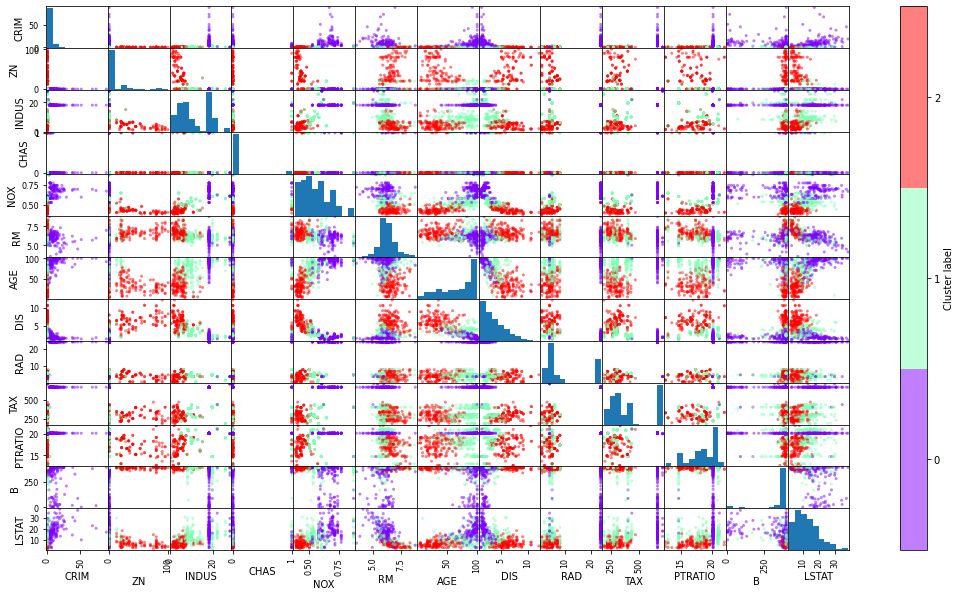

In [ ]:
# We can plot the same scatter plots and color the points with the cluster labels.

fig, ax = plt.subplots(figsize=[18,10])
caxes = pd.plotting.scatter_matrix(data, c=cluster_predictions, ax=ax, cmap=plt.cm.get_cmap('rainbow',3), 
    vmin=-0.5, vmax=2.5)
im = caxes[0,1].collections[0]
cbar = fig.colorbar(im, ax=caxes, ticks=range(4), label='Cluster label')

plt.show()

To visualize better the data, we can apply dimensionality reduction techniques.

### Dimensionality Reduction of the Data with Principal Component Analysis.

PCA pojects the data in two (or more) vectors constructed as linear combinations of the original vectors. The vectors chosed are the ones that "capture the most variance", the ones that represent the most relevant directions in the data (in a linear sense)

Read more about PCA: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

### Aternative non-linear approach: TSNE
TSNE is a family of techniques called manifold learning (https://scikit-learn.org/stable/modules/manifold.html) . It constructs a graph by connecting each point with its neighbours, which is then disentangueled and projected in a lower dimensional space.

To understand better what Manifold Learning is:

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

Read more about t-SNE here:

https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a

https://distill.pub/2016/misread-tsne/

In [ ]:
tsne = TSNE(n_components=2, perplexity=50)
tsne_data = tsne.fit_transform(normalized_data)

Let's compare how they project the points in a two dimenional space:

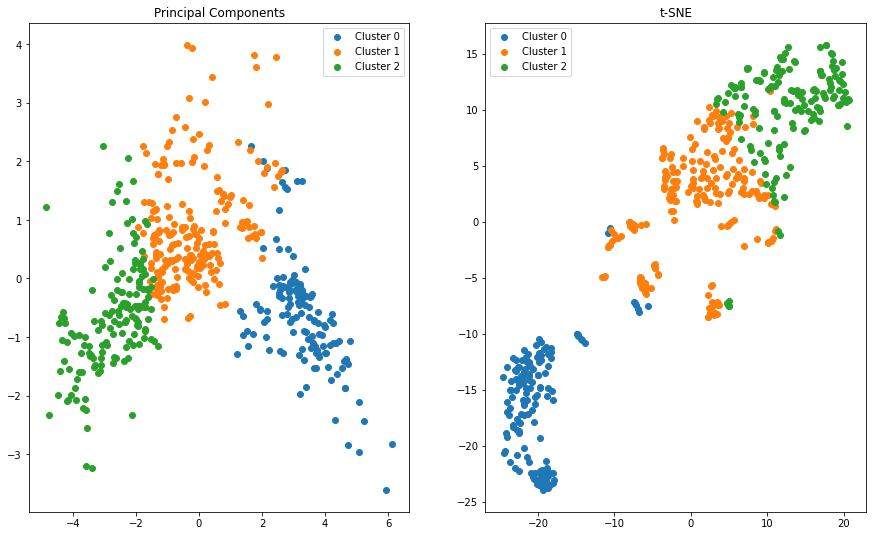

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,9))
axs[0].set_title('Principal Components')
axs[1].set_title('t-SNE')
for cluster in np.unique(cluster_predictions):
    plot1 = axs[0].scatter(pca_data[cluster_predictions == cluster,0], pca_data[cluster_predictions == cluster,1], label='Cluster {}'.format(cluster))
    plot2 = axs[1].scatter(tsne_data[cluster_predictions == cluster,0], tsne_data[cluster_predictions == cluster,1], label='Cluster {}'.format(cluster))
axs[0].legend()
axs[1].legend()
# fig.colorbar(plot2, ax=axs);


# Supervised Learning: Regression



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = normalized_data
Y = target

We can look at the 2D PCA and t-SNE projections color coded with the target property

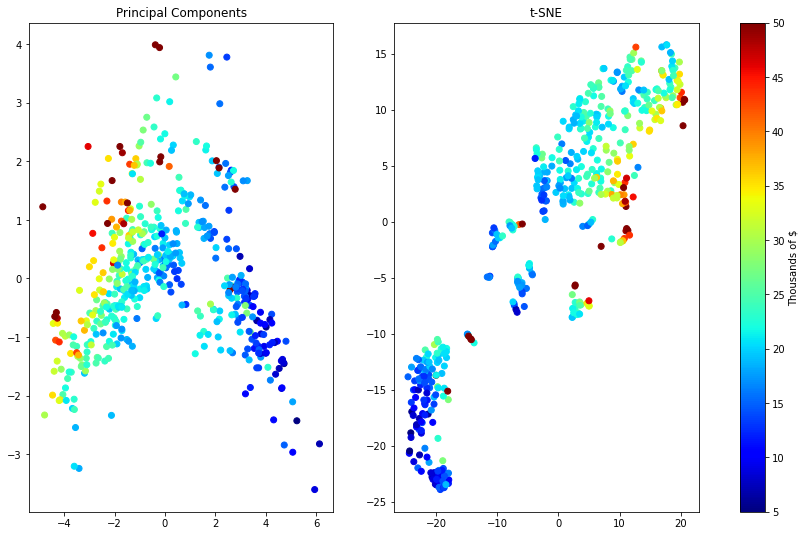

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,9))
axs[0].set_title('Principal Components')
axs[1].set_title('t-SNE')

plot1 = axs[0].scatter(pca_data[:, 0], pca_data[:, 1], c=target, cmap='jet')
plot2 = axs[1].scatter(tsne_data[:, 0], tsne_data[:, 1], c=target, cmap='jet')

cbar = fig.colorbar(plot2, ax=axs);
cbar.set_label('Thousands of $')
plt.show()

## Train / Test split

In Supervised Machine Learning it is crucial to separate the data into a training a test sets. The test set is used to evaluate the accuracy of a model trained with the training set. 

In [ ]:
# We use 20% of the data as test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Linear Regression

Everyone knows about the linear regression, but not everyone knows how to use it well. Read this to understand better how to use it! https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

Here we try to fit a linear regression from our features to the target property.

In [ ]:
lin_reg = sklearn.linear_model.LinearRegression()

lin_reg.fit(X_train, Y_train)

lr_train_predictions = lin_reg.predict(X_train)
lr_test_predictions = lin_reg.predict(X_test)

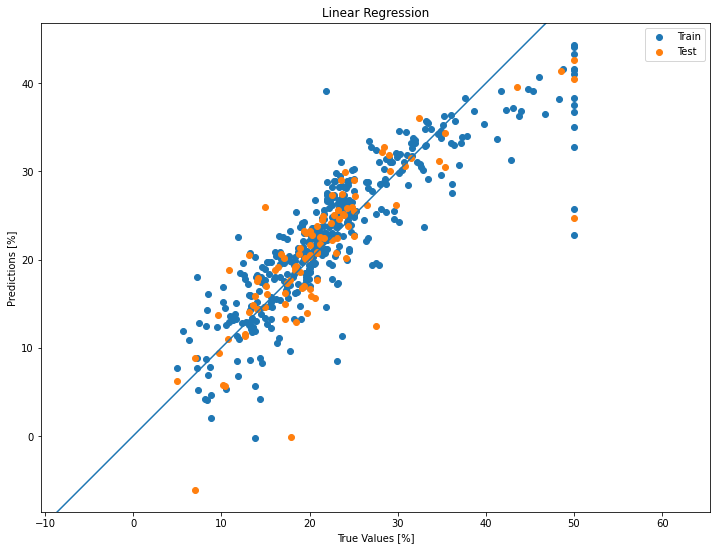

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Y_train, lr_train_predictions, label='Train')
plt.scatter(Y_test, lr_test_predictions, label='Test')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('True Values [%]')
plt.ylabel('Predictions [%]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000]);


In [ ]:
print('Score R2 on the training set:', lin_reg.score(X_train, Y_train))
print('Score R2 on test set:', lin_reg.score(X_test, Y_test))

Score R2 on the training set: 0.7508856358979673
Score R2 on test set: 0.668759493535632


The obtained model is not horrible, but a linear model is very limiting. Let us more sofisticated models that can adapt to nonlinear relationships.

## Support Vector Machine

The support vector machine is a kernel method, similar to Gaussian Process Regression (GPR) or Kernel RIdge Regression (KRR). It constructs predictions by comparing new data to a set of reference data. The comparison is done via a function $k(x_i, x_j)$ that returns a measure of similarity between two points $x_i, x_j$, often called a "kernel". This method can be arbitrarily complex, so a hyperparameter that controls the complexity has to be optimized, what we call the regularization. The regularization limits complexity of the model so that it does not overfit the training data.

Read more about kernel models here:

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

The optimal value of the regularization parameter $C$ will be the one that minimizes the error on the test set. WE train the model for each hyperparameter and evaluate the error in the test set:

In [ ]:
c_params = np.linspace(5, 200, 30)

train_mean_squared_error = []
test_mean_squared_error = []

for cc in c_params:
    svr = SVR(kernel='rbf', C=cc)
    svr.fit(X_train, Y_train)
    train_mean_squared_error.append(sklearn.metrics.mean_squared_error(svr.predict(X_train), Y_train))
    test_mean_squared_error.append(sklearn.metrics.mean_squared_error(svr.predict(X_test), Y_test))

# print('Best Estimator', g_search.best_estimator_)

In [ ]:
best_c = c_params[np.argmin(test_mean_squared_error)]

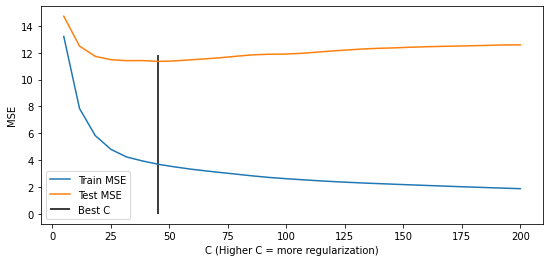

In [ ]:
fig, ax = plt.subplots(figsize=[9,4])
ax.plot(c_params, train_mean_squared_error, label='Train MSE')
ax.vlines([best_c], 0, 11.8, label='Best C', edgecolor='black')
ax.plot(c_params, test_mean_squared_error, label='Test MSE')
ax.set_ylabel('MSE')
ax.set_xlabel('C (Higher C = more regularization)')
ax.legend()
plt.show()

The higher the hyperparameter, the lower the complexity. You can see that the higher it is the lower is the training error. The test error however, decreases up to a point, before it starts increasing again. The value of $C$ that generates this minima is the optimal value. This is what is known as the variance v.s. bias tradeoff! 

Read more about this here: http://scott.fortmann-roe.com/docs/BiasVariance.html

In [ ]:
print('Best C:', best_c)

Best C: 45.3448275862069


In [ ]:
svr = SVR(kernel='rbf', C=best_c)
svr.fit(X_train, Y_train)
svr_train_predictions = svr.predict(X_train)
svr_test_predictions = svr.predict(X_test)

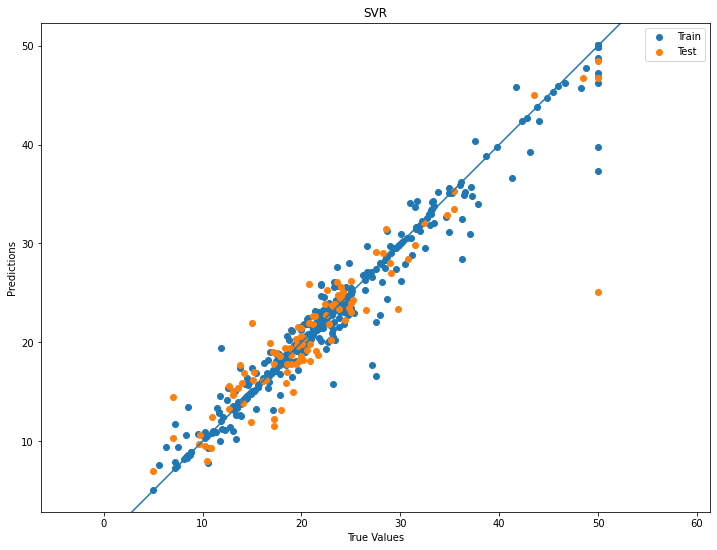

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Y_train, svr_train_predictions, label='Train')
plt.scatter(Y_test, svr_test_predictions, label='Test')
plt.legend()
plt.title('SVR')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000]);


You can see that this predictions are significantly better than the linear regression ones!

## Random Forest Regressor Algorithm

We will use now a different type of technique known as Random Forests.

<br>

Random forests are an example of an ensemble method, meaning that it relies on aggregating the results of an ensemble of simpler estimators. The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting.

<br>

Random forests are an example of an ensemble learner built on decision trees. Over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.

<br>

However, multiple overfitting estimators can be combined to reduce the effect of this overfitting, an effect called *bagging* that underlies ensemble methods. Bagging makes use of an ensemble of parallel estimators, each of which over-fits the data, and averages the results to find a better classification or regression. An ensemble of randomized decision trees is known as a random forest.

<br>

In general random forests are hard to overfit, and the accuracy of the algorithm converges when the number of trees in the forest increases.
(Learn more about Random Forests in https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ntrees_list = np.arange(1,30)
train_errors = []
test_errors = []
for ntrees in ntrees_list:
    rfr = RandomForestRegressor(n_estimators=ntrees)
    rfr.fit(X_train, Y_train)
    train_preds = rfr.predict(X_train)
    test_preds = rfr.predict(X_test)

    train_error = sklearn.metrics.mean_squared_error(train_preds, Y_train)
    train_errors.append(train_error)
    
    test_error = sklearn.metrics.mean_squared_error(test_preds, Y_test)
    test_errors.append(test_error)

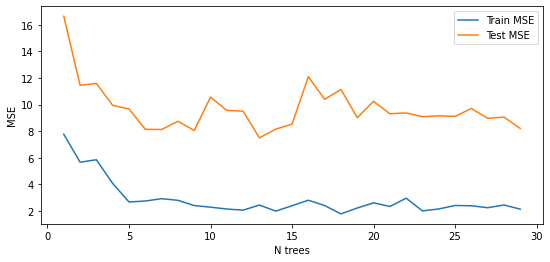

In [ ]:
fig, ax = plt.subplots(figsize=[9,4])
ax.plot(ntrees_list, train_errors, label='Train MSE')
# ax.vlines([best_c], 0, 11.8, label='Best C', edgecolor='black')
ax.plot(ntrees_list, test_errors, label='Test MSE')
ax.set_ylabel('MSE')
ax.set_xlabel('N trees')
ax.legend()
plt.show()

We see that the error decreases and stabilizes with the number of trees in the forest.

In [ ]:
rfr = RandomForestRegressor(n_estimators=400)
rfr.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=400)

A very useful property of random forests is that they can evaluate the importance of each feature!

In [ ]:
feature_importances = rfr.feature_importances_

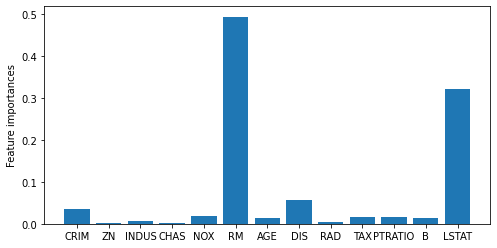

In [ ]:
fig, ax = plt.subplots(figsize=[8,4])

ax.bar(data.columns, feature_importances)
ax.set_ylabel('Feature importances')
plt.show()

The most important features are RM (average number of rooms per dwelling) and LSTAT ( % lower status of the population)

In [ ]:
#we can make predictions with the trained algorithm and calculate the score for the training and the test

In [ ]:
Y_pred_train = rfr.predict(X_train)

In [ ]:
Y_pred = rfr.predict(X_test)

In [ ]:
print('Score on training set:', rfr.score(X_train, Y_train))

Score on training set: 0.978410520266527


In [ ]:
print('Score on test set:', rfr.score(X_test, Y_test))

Score on test set: 0.8836362925605874


In [ ]:
#Visualization Random Forest
#Need to redraw the parity line

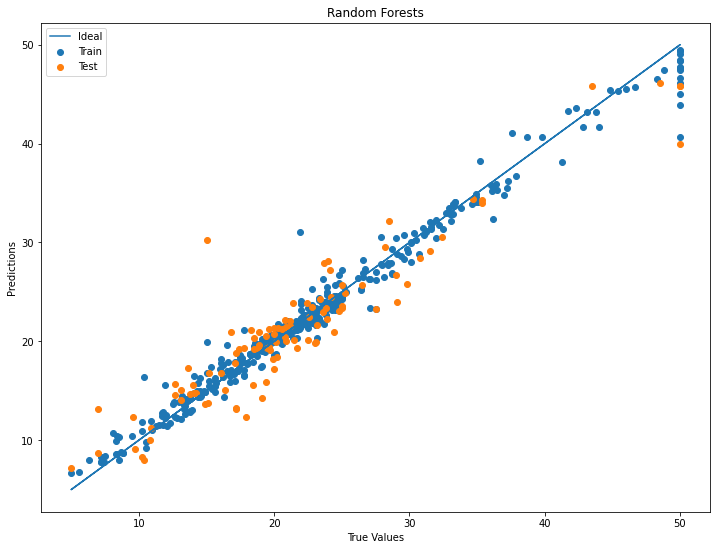

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Y_train, Y_pred_train, label='Train')
plt.scatter(Y_test, Y_pred, label='Test')
plt.plot(target, target, label='Ideal');
plt.legend()
plt.title('Random Forests')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Neural networks(NN) are set layers of highly interconnected processing elements (neurons) that make a series of transformations on the data to generate its own understanding of the features.

<img align="right" src="./data/nn.png" alt="Drawing" style="width: 300px;"/> 

A neural network has 3 basic elements:
-   Input layer: It is used to pass in our input(an image, text or any suitable type of data for NN).
-   Hidden Layers: These are the layers in between the input and output layers. These layers are responsible for learning the mapping between input and output.
-   Output Layer: This layer is responsible for giving us the output of the NN given our inputs.



A node in a layer applies a non-linear transformation to the signal. Then the signal is passed to the nodes in the next layer and multiplied by a coefficient. The original features are transformed from layer to layer until they can be linearly related to the target.
<br>
<br>
Training the network means to train the coefficients that pass the information from node to node. This is done using the *backpropagation* method. In fitting a neural network, backpropagation computes the gradient of the loss function with respect to the weights (the coefficients) of the network for a single input–output example, and does so efficiently, unlike a naive direct computation of the gradient with respect to each weight individually. This efficiency makes it feasible to use gradient methods for training multilayer networks, updating weights to minimize loss; gradient descent, or variants such as stochastic gradient descent, are commonly used. The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight by the chain rule, computing the gradient one layer at a time, iterating backward from the last layer

In [ ]:
model = keras.Sequential(
    [
        # Inpute layer
        layers.Dense(64, activation='relu',input_shape=[X_train.shape[1]]),
        # Hidden layers
        layers.Dropout(0.1),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.1),
        # Output layer
        layers.Dense(1)
    ])

In [ ]:
# model.add(Dense(64,activation='relu',input_shape=(13,)))
# model.add(Dropout(0.1))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='mse', optimizer='rmsprop');

In [ ]:
#Lets see how NN model looks like

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, epochs=500, validation_split = 0.1, verbose=0);

In [ ]:
epoc_list = model.history.epoch
train_loss = np.sqrt(np.array(model.history.history['loss']))
test_loss = np.sqrt(np.array(model.history.history['val_loss']))

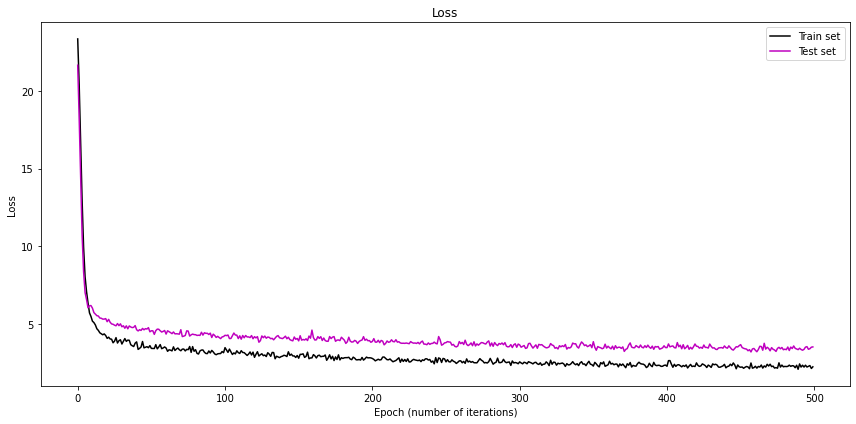

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss')
plt.xlabel('Epoch (number of iterations)')
plt.ylabel('Loss')
plt.plot(epoc_list, train_loss, 'k', label='Train set')
plt.plot(epoc_list, test_loss, 'm', label='Test set')
plt.legend()
# plt.yscale('log')
# plt.yticks(np.arange(2, 16, 2))
plt.tight_layout()

          

In [ ]:
predict_on_train = model.predict(X_train).flatten()
predict_on_test = model.predict(X_test).flatten()

print('Score on training set:', sklearn.metrics.r2_score(Y_train, predict_on_train))
print('Score on test set:', sklearn.metrics.r2_score(Y_test, predict_on_test))

Score on training set: 0.9611213988839761
Score on test set: 0.8594996597278007


In [ ]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

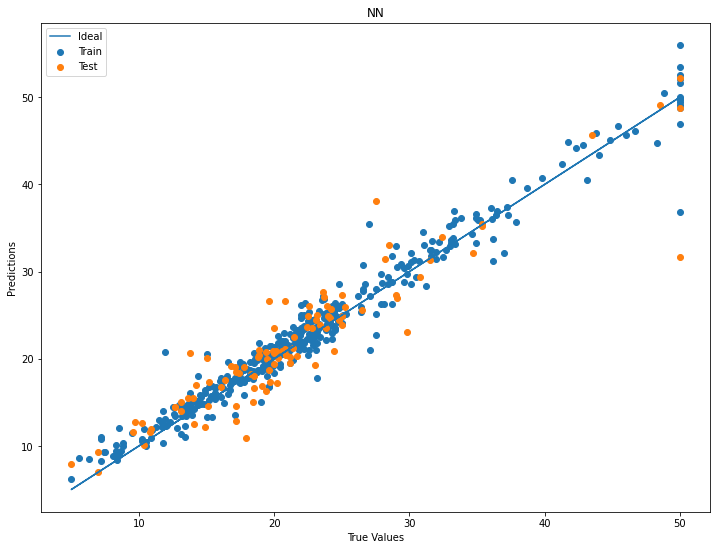

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Y_train, Y_pred_train, label='Train')
plt.scatter(Y_test, Y_pred_test, label='Test')
plt.plot(target, target, label='Ideal');
plt.legend()
plt.title('NN')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
model.feat

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c5b533d-8121-454d-9fa0-cbfc9a47c2e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>